In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import metrics
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

## Load [Data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

In [2]:
digits_data = datasets.load_digits() # Load dataset handwritten

In [3]:
dir(digits_data) # attributes of data

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
print(digits_data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [5]:
digits_data.data.shape

(1797, 64)

* Data bao gồm 1797 bức ảnh, mỗi bức có kích thước 8x8 pixels

## Explore Data

In [6]:
digits_data.images[0] # Vector của hình ảnh đầu tiên

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [7]:
digits_data.target_names[0] # First pic is number 0

np.int64(0)

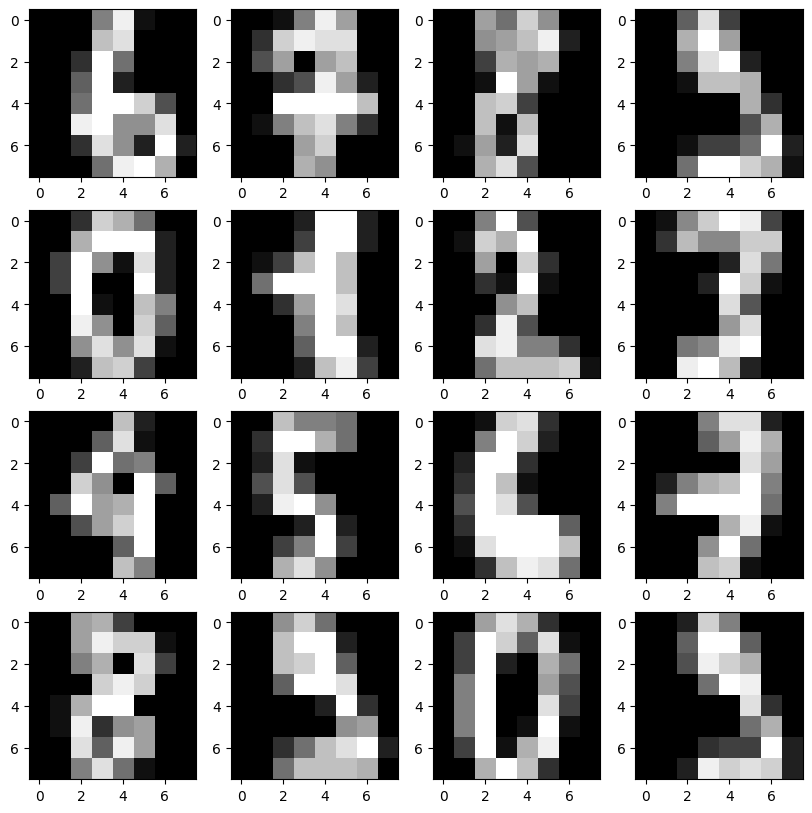

In [8]:
def plot_number(i):
  n = 16 # Show 16 pic of number with start point is 'i'
  fig = plt.figure(figsize=(10, 10))
  for j in range(n):
    ax = fig.add_subplot(4, 4, j+1)
    ax.imshow(digits_data.images[i*n+j], cmap='gray')
plot_number(1)

## Define labels and features

In [9]:
y = digits_data.target
X = digits_data.images.reshape((len(digits_data.images), -1))

In [10]:
y
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

## Find best parameter with gridsearch method


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split data into train and test

### KNN

In [13]:
knn = KNeighborsClassifier()

In [14]:
# Standard Scaler KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
# parameter KNN
param_grid_KNN = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],  # Số lượng hàng xóm
    'knn__weights': ['uniform', 'distance'],  # Trọng số của hàng xóm
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']  # Khoảng cách
}
grid_KNN = GridSearchCV(pipeline, param_grid_KNN, cv=5) # use 5 fold cross-valid to evaluate of each parameter
grid_KNN.fit(X_train, y_train)
print(f"Tham số tốt nhất: {grid_KNN.best_params_}")
print(f"Độ chính xác trung bình tốt nhất: {grid_KNN.best_score_}")

Tham số tốt nhất: {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}
Độ chính xác trung bình tốt nhất: 0.9770276809910957


In [15]:
# MinMaxScaler KNN
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()
pipeline = Pipeline([
    ('knn', KNeighborsClassifier())
])

param_grid_KNN = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_KNN = GridSearchCV(pipeline, param_grid_KNN, cv=5) # use 5 fold cross-valid to evaluate of each parameter
grid_KNN.fit(X_train_scaled, y_train)
print(f"Tham số tốt nhất: {grid_KNN.best_params_}")
print(f"Độ chính xác trung bình tốt nhất: {grid_KNN.best_score_}")


Tham số tốt nhất: {'knn__metric': 'euclidean', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}
Độ chính xác trung bình tốt nhất: 0.9867789392179637


### SVC

In [16]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])
# parameter SVC
param_grid_SVC = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'svc__kernel': ['rbf', 'linear']
}
grid_SVC = GridSearchCV(pipeline, param_grid_SVC, cv=5) # use 5 fold cross-valid to evaluate of each parameter
grid_SVC.fit(X_train, y_train)
print(f"Tham số tốt nhất: {grid_SVC.best_params_}")
print(f"Độ chính xác trung bình tốt nhất: {grid_SVC.best_score_}")

Tham số tốt nhất: {'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Độ chính xác trung bình tốt nhất: 0.9812161246612467


In [17]:
# MinMaxScaler SVC
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svc', SVC())
])

# Danh sách tham số của SVC
param_grid_SVC = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'svc__kernel': ['rbf', 'linear']
}
grid_SVC = GridSearchCV(pipeline, param_grid_SVC, cv=5)
grid_SVC.fit(X_train, y_train)
print(f"Tham số tốt nhất: {grid_SVC.best_params_}")
print(f"Độ chính xác trung bình tốt nhất: {grid_SVC.best_score_}")


Tham số tốt nhất: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Độ chính xác trung bình tốt nhất: 0.9923514324428959


**Kết luận:**

* KNN cao nhất: 0.987

* SVC cao nhất: 0.99

**Mô hình SVC tốt hơn với độ chính xác là 0.99 với phương pháp chuẩn hoá Min Max**

In [18]:
C = grid_SVC.best_params_['svc__C']
gamma = grid_SVC.best_params_['svc__gamma']
kernel = grid_SVC.best_params_['svc__kernel']

## Train data by using KFold method

In [19]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [20]:
accuracies = []
# Training and evaluate model on each fold
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Normalize
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)  # fit and transform train
    X_test = scaler.transform(X_test)  # transform test

    model = SVC(C=C, gamma=gamma, kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Fold {fold + 1}: Độ chính xác = {acc:.4f}")

Fold 1: Độ chính xác = 0.9861
Fold 2: Độ chính xác = 0.9889
Fold 3: Độ chính xác = 0.9777
Fold 4: Độ chính xác = 0.9972
Fold 5: Độ chính xác = 0.9916


* Mô hình có điểm số accuracy tốt ở các fold khác nhau

## Evaluate model

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = SVC(C=C, gamma=gamma, kernel=kernel)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [22]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='macro') # No weighting per class
recall = metrics.recall_score(y_test, y_pred, average='macro')
f1 = metrics.f1_score(y_test, y_pred, average='macro')
acc = accuracy_score(y_test, y_pred)

### Confuse matrix

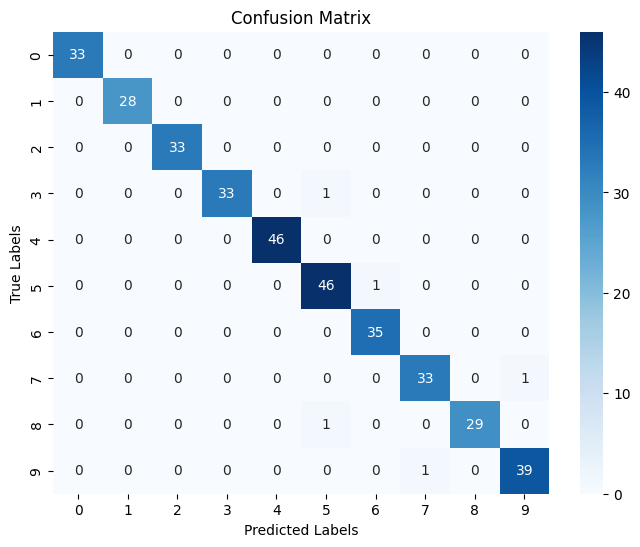

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

* Mô hình cho thấy mô hình có thể bị mắc lỗi giữa các cặp số `[3, 5], [5, 6], [7, 9], [8, 5]`
 * Trên thực tế, các cặp số này khi viết nhanh có thể sẽ có hình dạng gần giống nhau.

### Precision
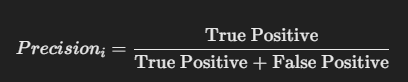

In [24]:
precision

0.9876143790849673

* Mô hình dự đoán đúng với xác suất 98% trên tổng số mẫu đã dự đoán

### Recall
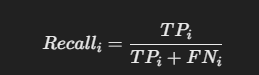

In [25]:
recall

0.9861566541510222

* Trong số các mẫu thực sự thuộc lớp đúng của nó, mô hình dự đoán đúng cao

 --> Mô hình bắt được hầu hết các chữ số viết tay đúng (không bỏ sót số nào)

### F1-Score
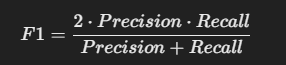

In [26]:
f1

0.9868050255206742

* Mô hình vừa chính xác cao và vừa có khả năng gán nhầm nhãn thấp

### Accuracy
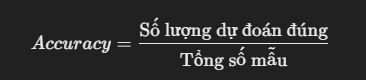

In [27]:
acc

0.9861111111111112

* Mô hình có khả năng nhận diện chữ số viết tay chính xác đến 98%

### Over all

In [28]:
print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(y_test, y_pred)}\n"
)

Classification report for classifier SVC(C=10):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.96      0.98      0.97        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360




## Test

In [29]:
sample = X[6]
sample = sample.reshape(1, -1)
sample = scaler.transform(sample)
test_predict = model.predict(sample)
test_predict

array([6])